In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
class Stoikov():
    
    def __init__ (self, terminal_time, volatility, timestep, risk_aversion, k, A):
        self.T = terminal_time
        self.sigma = volatility
        self.dt = timestep
        self.gamma = risk_aversion
        self.k = k
        self.A = A
    
    def get_bid_ask(self, s, t, q): #this function only calculates the bid and ask prices for the order but the order will be given out of the function
        
        r_price = s - q*self.gamma*(self.sigma**2)*(self.T-t)
        spread = self.gamma*(self.sigma**2)*(self.T-t) + (2/gamma)*math.log(1+gamma/k)
        bid = r_price - spread/2
        ask = r_price + spread/2
        return bid, ask

In [3]:
#Using backtest method given in the article

T = 1.0
n = 200 #size of simulation
dt = 1/200 #timestep
simulations = 1000 # number of simulations
sigma = 2
gamma = 0.1
k = 1.5
A = 140

model = Stoikov(T, sigma, dt, gamma, k, A)

avg_spread = []
profit = []
std = []

for i in range(simulations):
    
    s=np.zeros(n)
    q = np.zeros(n)
    bid = np.zeros(n)
    ask = np.zeros(n)
    r_price = np.zeros(n)
    delta_bid = np.zeros(n)
    delta_ask = np.zeros(n)
    w = np.zeros(n) #wealth
    equity = np.zeros(n)
    
    s[0] = 100
    bid[0] = 100
    ask[0] = 100
    
    for j in range(1, n):
        
        s[j] = s[j-1] + sigma * math.sqrt(dt) * np.random.standard_normal(1)
        bid[j], ask[j] = model.get_bid_ask(s[j], j/n, q[j-1])
        
        prob_ask = A*np.exp(-k*(ask[j]-s[j]))*dt
        random_ask = random.random()
        
        prob_bid = A*np.exp(-k*(s[j]-bid[j]))*dt
        random_bid = random.random()
        
        q[j] = q[j-1]
        w[j] = w[j-1]
        
        if prob_bid > random_bid:
            q[j]+=1
            w[j]= w[j] - bid[j]
        if prob_ask > random_ask:
            q[j] = q[j] - 1
            w[j] = w[j] + ask[j]
        equity[j] = w[j] + q[j] * s[j]
    profit.append(equity[-1])
    std.append(equity[-1])

                   Results              
----------------------------------------
Profit :64.9
Std(Profit) :6.48


Text(0.5, 1.0, 'Profit')

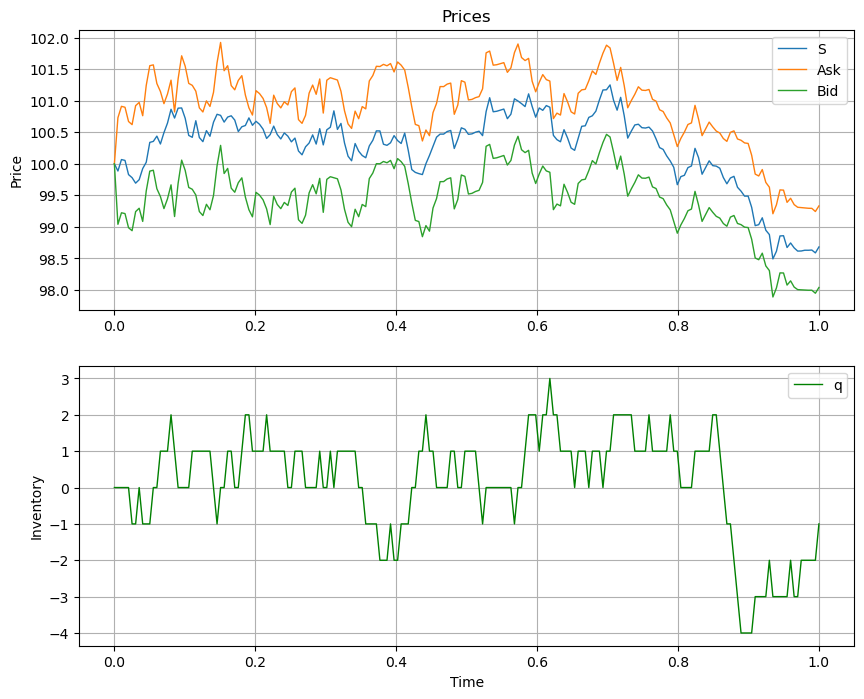

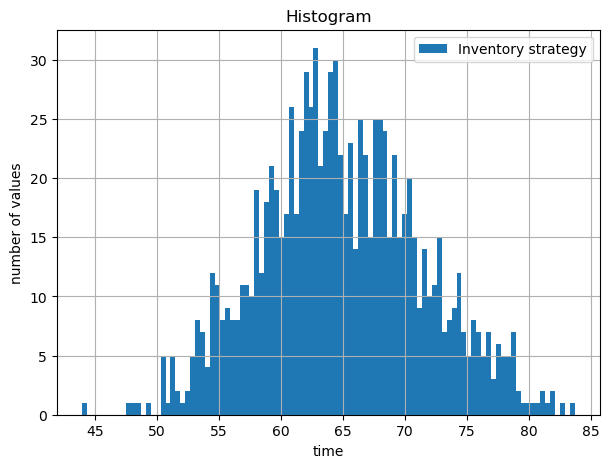

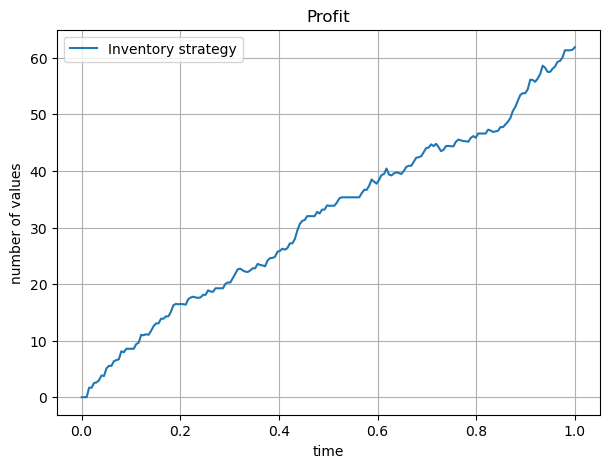

In [4]:
print ("                   Results              ")
print ("----------------------------------------")
print (f"Profit :{round(np.array(profit).mean(),2)}")
print (f"Std(Profit) :{round(np.array(std).std(), 2)}")
    

    
#Plots:

time = np.linspace(0., T, num= n)
    
fig=plt.figure(figsize=(10,8))  
plt.subplot(2,1,1) # number of rows, number of  columns, number of the subplot 
plt.plot(time,s[:], lw = 1., label = 'S')
plt.plot(time,ask[:], lw = 1., label = 'Ask')
plt.plot(time,bid[:], lw = 1., label = 'Bid')       
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('Price')
plt.title('Prices')
plt.subplot(2,1,2)
plt.plot(time, q[:], 'g', lw = 1., label = 'q') #plot 2 lines
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('Time')
plt.ylabel('Inventory')


#Histogram of profit:

plt.figure(figsize = (7,5))
plt.hist(np.array(profit), label = ['Inventory strategy'], bins = 100)
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('number of values')
plt.title('Histogram')
    

#PNL:


plt.figure(figsize = (7,5))
plt.plot(time,equity, label = 'Inventory strategy')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('number of values')
plt.title('Profit')
    


In [5]:
#Bactest it with real data
book = pd.read_csv('book.csv')
book.head()

,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,bids[22].price,bids[22].amount,asks[23].price,asks[23].amount,bids[23].price,bids[23].amount,asks[24].price,asks[24].amount,bids[24].price,bids[24].amount
0,binance-futures,BTCUSDT,1679443200138000000,1679443200485131264,28091.2,16.183,28091.1,0.001,28091.3,7.874,...,28087.8,0.006,28093.6,0.052,28087.7,0.036,28093.7,0.001,28087.6,0.002
1,binance-futures,BTCUSDT,1679443202062000000,1679443202065465600,28090.9,6.995,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
2,binance-futures,BTCUSDT,1679443202688000000,1679443202691394048,28090.9,7.005,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
3,binance-futures,BTCUSDT,1679443202809000000,1679443202812150528,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001
4,binance-futures,BTCUSDT,1679443203186000000,1679443203188767744,28090.9,6.885,28090.8,0.002,28091.0,0.735,...,28087.6,0.002,28093.4,0.674,28087.5,0.099,28093.5,0.401,28087.4,0.001


In [6]:
simulations = 10000

In [7]:
#split the data intto 1000 chunks (1000 testing simulations)
books = np.array_split(book,simulations)

In [ ]:
T = 1.0
sigma = 2
gamma = 0.1
k = 1.5
A = 140

model = Stoikov(T, sigma, dt, gamma, k, A)

avg_spread = []
profit = []
std = []

for i in range(simulations):
    
    chunk = books[i]
    
    s = np.array((chunk["asks[0].price"]+chunk["bids[0].price"])/2)
    time_records= np.array(chunk['local_timestamp'])
    n = len(s) # size of chunk
    dt = 1/n
    
    q = np.zeros(n)
    bid = np.zeros(n)
    ask = np.zeros(n)
    r_price = np.zeros(n)
    delta_bid = np.zeros(n)
    delta_ask = np.zeros(n)
    w = np.zeros(n) #wealth
    equity = np.zeros(n)
    
    ask[0] = s[0]
    bid[0] = s[0]
    
    for j in range(1, n):
        
        s[j] = s[j-1] + sigma * math.sqrt(dt) * np.random.standard_normal(1)
        bid[j], ask[j] = model.get_bid_ask(s[j], j/n, q[j-1])
        
        prob_ask = A*np.exp(-k*(ask[j]-s[j]))*dt
        random_ask = random.random()
        
        prob_bid = A*np.exp(-k*(s[j]-bid[j]))*dt
        random_bid = random.random()
        
        q[j] = q[j-1]
        w[j] = w[j-1]
        
        if prob_bid > random_bid:
            q[j]+=1
            w[j]= w[j] - bid[j]
        if prob_ask > random_ask:
            q[j] = q[j] - 1
            w[j] = w[j] + ask[j]
        equity[j] = w[j] + q[j] * s[j]
    
    print(f"Simulation {i+1}: equity = {equity[-1]}, inventory = {q[-1]}")
    profit.append(equity[-1])
    std.append(equity[-1])
    
    

Simulation 1: equity = 62.2903363944788, inventory = 3.0
Simulation 2: equity = 66.97898106581852, inventory = 2.0
Simulation 3: equity = 48.02753353906155, inventory = -2.0
Simulation 4: equity = 70.21520245254214, inventory = 3.0
Simulation 5: equity = 65.21211833597772, inventory = 2.0
Simulation 6: equity = 73.06794383942542, inventory = 0.0
Simulation 7: equity = 65.19948526546796, inventory = 1.0
Simulation 8: equity = 57.69185814526281, inventory = 5.0
Simulation 9: equity = 57.73858424053469, inventory = 2.0
Simulation 10: equity = 62.195014067794546, inventory = 3.0
Simulation 11: equity = 63.75477920589037, inventory = -5.0
Simulation 12: equity = 66.02818396447401, inventory = -3.0
Simulation 13: equity = 59.805911707822816, inventory = 3.0
Simulation 14: equity = 67.17572298868618, inventory = -2.0
Simulation 15: equity = 42.30930238281144, inventory = 1.0
Simulation 16: equity = 64.07007348017578, inventory = 1.0
Simulation 17: equity = 47.71024024696089, inventory = -5.0


Simulation 167: equity = 64.50236445014889, inventory = 4.0
Simulation 168: equity = 69.34370563406264, inventory = 4.0
Simulation 169: equity = 58.943187180888344, inventory = 1.0
Simulation 170: equity = 57.2076326583483, inventory = 0.0
Simulation 171: equity = 51.86764107925774, inventory = -1.0
Simulation 172: equity = 66.5996894790951, inventory = -1.0
Simulation 173: equity = 64.00909769655846, inventory = 4.0
Simulation 174: equity = 59.16263621181133, inventory = -5.0
Simulation 175: equity = 64.0314664173493, inventory = -4.0
Simulation 176: equity = 69.40114356148842, inventory = 2.0
Simulation 177: equity = 62.24869435182336, inventory = -2.0
Simulation 178: equity = 66.07707946214941, inventory = -6.0
Simulation 179: equity = 64.13015736787565, inventory = -1.0
Simulation 180: equity = 56.42953289179786, inventory = -1.0
Simulation 181: equity = 66.47468757623574, inventory = -6.0
Simulation 182: equity = 68.48220907984069, inventory = -2.0
Simulation 183: equity = 62.8377

Simulation 338: equity = 52.565589421508776, inventory = -2.0
Simulation 339: equity = 74.02424378010619, inventory = 4.0
Simulation 340: equity = 61.48575733947655, inventory = 1.0
Simulation 341: equity = 60.44979110645727, inventory = -1.0
Simulation 342: equity = 58.82268922688672, inventory = 6.0
Simulation 343: equity = 71.92853060093694, inventory = -1.0
Simulation 344: equity = 66.91944743844215, inventory = -6.0
Simulation 345: equity = 66.32963786186883, inventory = 8.0
Simulation 346: equity = 67.57246116411261, inventory = 1.0
Simulation 347: equity = 56.26775717882629, inventory = 1.0
Simulation 348: equity = 69.69649555212527, inventory = -1.0
Simulation 349: equity = 65.83499872655375, inventory = 4.0
Simulation 350: equity = 68.39281999692321, inventory = -4.0
Simulation 351: equity = 63.506380204402376, inventory = -2.0
Simulation 352: equity = 71.6274911289911, inventory = 1.0
Simulation 353: equity = 52.777656585603836, inventory = 2.0
Simulation 354: equity = 72.282

Simulation 489: equity = 73.28172583665582, inventory = -3.0
Simulation 490: equity = 72.95143330769861, inventory = 0.0
Simulation 491: equity = 61.134953249187674, inventory = 7.0
Simulation 492: equity = 78.71508966389229, inventory = -6.0
Simulation 493: equity = 67.57353188627167, inventory = -7.0
Simulation 494: equity = 56.333492905047024, inventory = -2.0
Simulation 495: equity = 66.39429590078726, inventory = 0.0
Simulation 496: equity = 60.82146376100718, inventory = -5.0
Simulation 497: equity = 64.61261810222277, inventory = 1.0
Simulation 498: equity = 56.546382267348235, inventory = -5.0
Simulation 499: equity = 63.42041923709621, inventory = 3.0
Simulation 500: equity = 76.29219927982194, inventory = -5.0
Simulation 501: equity = 63.523309816388064, inventory = 0.0
Simulation 502: equity = 61.00684087303671, inventory = -2.0
Simulation 503: equity = 55.79751697868778, inventory = -1.0
Simulation 504: equity = 63.65289569456945, inventory = 1.0
Simulation 505: equity = 53

Simulation 639: equity = 66.3502971096168, inventory = 3.0
Simulation 640: equity = 67.06428902045445, inventory = -2.0
Simulation 641: equity = 61.25390064276871, inventory = -5.0
Simulation 642: equity = 59.203228406193375, inventory = -2.0
Simulation 643: equity = 70.83403112226733, inventory = 1.0
Simulation 644: equity = 57.2914773951743, inventory = 1.0
Simulation 645: equity = 59.969646832338185, inventory = 2.0
Simulation 646: equity = 68.48171045929485, inventory = 1.0
Simulation 647: equity = 74.64812711128616, inventory = 5.0
Simulation 648: equity = 63.546121356215735, inventory = -2.0
Simulation 649: equity = 78.41818354861607, inventory = 2.0
Simulation 650: equity = 60.969785421406414, inventory = 0.0
Simulation 651: equity = 66.30476706832997, inventory = -6.0
Simulation 652: equity = 67.7589958783501, inventory = -1.0
Simulation 653: equity = 58.11751084573916, inventory = 5.0
Simulation 654: equity = 57.600094264729705, inventory = -1.0
Simulation 655: equity = 58.089

Simulation 781: equity = 71.54641965431802, inventory = 0.0
Simulation 782: equity = 60.73022560550453, inventory = 2.0
Simulation 783: equity = 63.81657941018784, inventory = 0.0
Simulation 784: equity = 53.68124674959108, inventory = -4.0
Simulation 785: equity = 64.02045098424423, inventory = -6.0
Simulation 786: equity = 58.52830491496934, inventory = -1.0
Simulation 787: equity = 46.983558006220846, inventory = 4.0
Simulation 788: equity = 71.04924959069467, inventory = 1.0
Simulation 789: equity = 61.273072723841324, inventory = 0.0
Simulation 790: equity = 70.29621643737482, inventory = -1.0
Simulation 791: equity = 65.7636592890085, inventory = 0.0
Simulation 792: equity = 55.774141637761204, inventory = 0.0
Simulation 793: equity = 66.70309247313708, inventory = 2.0
Simulation 794: equity = 62.07102396749542, inventory = -6.0
Simulation 795: equity = 48.89257959929819, inventory = -2.0
Simulation 796: equity = 61.44227046109154, inventory = -5.0
Simulation 797: equity = 74.019

Simulation 930: equity = 62.25985546058655, inventory = -1.0
Simulation 931: equity = 70.57683920416821, inventory = -1.0
Simulation 932: equity = 63.027496212904225, inventory = 2.0
Simulation 933: equity = 56.00919909100048, inventory = -4.0
Simulation 934: equity = 58.6160338382324, inventory = 3.0
Simulation 935: equity = 76.2350508448726, inventory = -3.0
Simulation 936: equity = 69.68370584915101, inventory = 4.0
Simulation 937: equity = 66.01409625711676, inventory = 0.0
Simulation 938: equity = 57.105419490770146, inventory = -1.0
Simulation 939: equity = 63.98237027561845, inventory = 1.0
Simulation 940: equity = 66.92203984953812, inventory = 5.0
Simulation 941: equity = 66.63823666702956, inventory = -6.0
Simulation 942: equity = 68.44558390583552, inventory = -4.0
Simulation 943: equity = 62.31533033758751, inventory = 7.0
Simulation 944: equity = 65.51990803412627, inventory = 2.0
Simulation 945: equity = 68.65110003732843, inventory = -3.0
Simulation 946: equity = 59.8235

Simulation 1084: equity = 59.507728891629085, inventory = 2.0
Simulation 1085: equity = 67.03832366022834, inventory = 0.0
Simulation 1086: equity = 68.36921742411869, inventory = 1.0
Simulation 1087: equity = 70.36100496876315, inventory = 2.0
Simulation 1088: equity = 74.48125904021435, inventory = -4.0
Simulation 1089: equity = 60.198869577405276, inventory = 0.0
Simulation 1090: equity = 61.91965521988459, inventory = -6.0
Simulation 1091: equity = 61.086752630086266, inventory = 4.0
Simulation 1092: equity = 57.49370286654448, inventory = -3.0
Simulation 1093: equity = 68.95022181529202, inventory = 4.0
Simulation 1094: equity = 65.62380386484074, inventory = -1.0
Simulation 1095: equity = 60.41206961104763, inventory = 6.0
Simulation 1096: equity = 51.29593197826034, inventory = 2.0
Simulation 1097: equity = 58.25725686775695, inventory = 4.0
Simulation 1098: equity = 60.24297513466445, inventory = -8.0
Simulation 1099: equity = 62.21261044440325, inventory = 2.0
Simulation 1100:

Simulation 1239: equity = 49.48899210241507, inventory = 1.0
Simulation 1240: equity = 57.748423544722755, inventory = -1.0
Simulation 1241: equity = 59.57470307103358, inventory = -3.0
Simulation 1242: equity = 65.43067580193747, inventory = -5.0
Simulation 1243: equity = 60.552269441286626, inventory = 0.0
Simulation 1244: equity = 69.59043835323246, inventory = -3.0
Simulation 1245: equity = 53.907501033474546, inventory = 1.0
Simulation 1246: equity = 66.46901357540628, inventory = 4.0
Simulation 1247: equity = 58.194034786738484, inventory = 1.0
Simulation 1248: equity = 94.33810982584691, inventory = -1.0
Simulation 1249: equity = 58.28135636915613, inventory = 0.0
Simulation 1250: equity = 68.36009890976857, inventory = -2.0
Simulation 1251: equity = 60.667685551714385, inventory = -3.0
Simulation 1252: equity = 56.28320928172616, inventory = 2.0
Simulation 1253: equity = 57.472580525085505, inventory = -1.0
Simulation 1254: equity = 60.47473920023913, inventory = 2.0
Simulation

Simulation 1391: equity = 73.43885460424644, inventory = 2.0
Simulation 1392: equity = 58.94587927614339, inventory = 5.0
Simulation 1393: equity = 67.15273555475869, inventory = 3.0
Simulation 1394: equity = 67.94749032899563, inventory = -4.0
Simulation 1395: equity = 78.2218247829478, inventory = 1.0
Simulation 1396: equity = 70.04377789932187, inventory = -3.0
Simulation 1397: equity = 57.265098863703315, inventory = 3.0
Simulation 1398: equity = 56.021798262510856, inventory = 0.0
Simulation 1399: equity = 58.6283415288126, inventory = 2.0
Simulation 1400: equity = 85.90407723407043, inventory = 0.0
Simulation 1401: equity = 64.14304309233557, inventory = 7.0
Simulation 1402: equity = 59.925011681829346, inventory = 5.0
Simulation 1403: equity = 69.14552727163755, inventory = -1.0
Simulation 1404: equity = 54.348874370250996, inventory = 0.0
Simulation 1405: equity = 68.18829137893044, inventory = -6.0
Simulation 1406: equity = 65.88799693795954, inventory = 1.0
Simulation 1407: e

Simulation 1538: equity = 65.61059722860591, inventory = 0.0
Simulation 1539: equity = 70.73330113712291, inventory = 4.0
Simulation 1540: equity = 63.88721836175682, inventory = 0.0
Simulation 1541: equity = 62.995881270351674, inventory = 1.0
Simulation 1542: equity = 66.17262294061948, inventory = -3.0
Simulation 1543: equity = 80.3366607668504, inventory = 1.0
Simulation 1544: equity = 63.70238920614065, inventory = 1.0
Simulation 1545: equity = 62.13817139240564, inventory = 3.0
Simulation 1546: equity = 64.99036083849205, inventory = -3.0
Simulation 1547: equity = 78.60637096769642, inventory = 3.0
Simulation 1548: equity = 70.2911706371815, inventory = 2.0
Simulation 1549: equity = 73.06619835665333, inventory = 2.0
Simulation 1550: equity = 74.64309039662476, inventory = -1.0
Simulation 1551: equity = 61.09954377995746, inventory = -2.0
Simulation 1552: equity = 72.7145133860322, inventory = -3.0
Simulation 1553: equity = 69.18904499571363, inventory = 2.0
Simulation 1554: equi

Simulation 1685: equity = 62.44423106161412, inventory = -1.0
Simulation 1686: equity = 70.07533619900641, inventory = -3.0
Simulation 1687: equity = 62.78496245896531, inventory = 2.0
Simulation 1688: equity = 68.67569594013912, inventory = 1.0
Simulation 1689: equity = 56.25665661843959, inventory = 0.0
Simulation 1690: equity = 70.93040904012742, inventory = 5.0
Simulation 1691: equity = 65.84738147087046, inventory = -4.0
Simulation 1692: equity = 64.87976935023107, inventory = -1.0
Simulation 1693: equity = 62.855083261980326, inventory = 3.0
Simulation 1694: equity = 77.34371136524715, inventory = -7.0
Simulation 1695: equity = 50.75795178483531, inventory = 4.0
Simulation 1696: equity = 45.17355699421023, inventory = 3.0
Simulation 1697: equity = 63.5461241469784, inventory = 1.0
Simulation 1698: equity = 51.71684522215219, inventory = 4.0
Simulation 1699: equity = 72.06371752457926, inventory = 5.0
Simulation 1700: equity = 64.89025697886973, inventory = 0.0
Simulation 1701: eq

Simulation 1845: equity = 70.94225401521544, inventory = 4.0
Simulation 1846: equity = 79.47881296189371, inventory = 0.0
Simulation 1847: equity = 62.03853353690647, inventory = 3.0
Simulation 1848: equity = 69.34992626269377, inventory = -2.0
Simulation 1849: equity = 67.45777912659105, inventory = 1.0
Simulation 1850: equity = 66.47123504690171, inventory = 1.0
Simulation 1851: equity = 65.60849337225955, inventory = -3.0
Simulation 1852: equity = 63.06196250389985, inventory = -1.0
Simulation 1853: equity = 73.21511371161614, inventory = 2.0
Simulation 1854: equity = 66.90089417257695, inventory = 3.0
Simulation 1855: equity = 63.155485021437926, inventory = 2.0
Simulation 1856: equity = 54.21823742786364, inventory = -2.0
Simulation 1857: equity = 60.270362804345496, inventory = -2.0
Simulation 1858: equity = 51.05725937564057, inventory = 1.0
Simulation 1859: equity = 67.50671376715763, inventory = 5.0
Simulation 1860: equity = 65.53975803157664, inventory = -6.0
Simulation 1861:

Simulation 2006: equity = 73.17205006607401, inventory = -4.0
Simulation 2007: equity = 60.421369668853, inventory = 4.0
Simulation 2008: equity = 74.766532063466, inventory = -1.0
Simulation 2009: equity = 55.83521694628871, inventory = -6.0
Simulation 2010: equity = 78.89373839850305, inventory = -5.0
Simulation 2011: equity = 57.35680558384047, inventory = -5.0
Simulation 2012: equity = 67.1708171143473, inventory = 1.0
Simulation 2013: equity = 64.88798265937658, inventory = 1.0
Simulation 2014: equity = 66.27386515459511, inventory = 3.0
Simulation 2015: equity = 58.63346776886101, inventory = -1.0
Simulation 2016: equity = 61.398373960037134, inventory = 1.0
Simulation 2017: equity = 61.010992168234225, inventory = -1.0
Simulation 2018: equity = 67.96591090766378, inventory = 1.0
Simulation 2019: equity = 64.8895179116771, inventory = 1.0
Simulation 2020: equity = 73.84520416344458, inventory = 2.0
Simulation 2021: equity = 63.75594445916795, inventory = -2.0
Simulation 2022: equ

Simulation 2166: equity = 64.57667846983531, inventory = -4.0
Simulation 2167: equity = 64.62299268091738, inventory = 2.0
Simulation 2168: equity = 68.00966911096475, inventory = -5.0
Simulation 2169: equity = 65.90062244887667, inventory = -1.0
Simulation 2170: equity = 50.42869571684423, inventory = -1.0
Simulation 2171: equity = 70.82592181489235, inventory = 1.0
Simulation 2172: equity = 56.55496076087002, inventory = 7.0
Simulation 2173: equity = 69.01799441840194, inventory = 1.0
Simulation 2174: equity = 60.25743780142511, inventory = -5.0
Simulation 2175: equity = 55.57092581568941, inventory = -1.0
Simulation 2176: equity = 68.83997327131146, inventory = 0.0
Simulation 2177: equity = 67.59414439835382, inventory = 0.0
Simulation 2178: equity = 68.66965369027457, inventory = -4.0
Simulation 2179: equity = 65.48141995747574, inventory = 3.0
Simulation 2180: equity = 57.44145971321268, inventory = 1.0
Simulation 2181: equity = 64.74321515126212, inventory = -3.0
Simulation 2182:

Simulation 2333: equity = 59.11156501618825, inventory = -2.0
Simulation 2334: equity = 70.63484876085568, inventory = -1.0
Simulation 2335: equity = 60.778507603448816, inventory = -3.0
Simulation 2336: equity = 59.309795537017635, inventory = 2.0
Simulation 2337: equity = 72.69014285034064, inventory = -2.0
Simulation 2338: equity = 73.61904931362369, inventory = -3.0
Simulation 2339: equity = 85.85346195956663, inventory = 1.0
Simulation 2340: equity = 70.01651070640219, inventory = 1.0
Simulation 2341: equity = 67.6575281121768, inventory = -5.0
Simulation 2342: equity = 58.095936242800235, inventory = 1.0
Simulation 2343: equity = 60.55491715806784, inventory = 1.0
Simulation 2344: equity = 61.289116106800066, inventory = 0.0
Simulation 2345: equity = 67.87054652427832, inventory = -1.0
Simulation 2346: equity = 65.61459649800236, inventory = 2.0
Simulation 2347: equity = 77.1774293257622, inventory = -5.0
Simulation 2348: equity = 65.16452142487105, inventory = -1.0
Simulation 23

Simulation 2490: equity = 62.072344545813394, inventory = 3.0
Simulation 2491: equity = 59.463664104405325, inventory = -2.0
Simulation 2492: equity = 49.56589282491768, inventory = -4.0
Simulation 2493: equity = 60.39834136454738, inventory = 7.0
Simulation 2494: equity = 73.07028298210207, inventory = 2.0
Simulation 2495: equity = 62.25788450755863, inventory = -1.0
Simulation 2496: equity = 78.03791601145349, inventory = 2.0
Simulation 2497: equity = 67.1638662066689, inventory = -4.0
Simulation 2498: equity = 56.117250326911744, inventory = 0.0
Simulation 2499: equity = 59.44275079997897, inventory = -4.0
Simulation 2500: equity = 64.28548606298864, inventory = 1.0
Simulation 2501: equity = 66.90653362085868, inventory = 2.0
Simulation 2502: equity = 69.41531513698646, inventory = -1.0
Simulation 2503: equity = 62.60981616866775, inventory = -7.0
Simulation 2504: equity = 60.311139318335336, inventory = 8.0
Simulation 2505: equity = 70.58119786252428, inventory = 1.0
Simulation 250

Simulation 2651: equity = 60.718475268542534, inventory = -6.0
Simulation 2652: equity = 57.93763718556875, inventory = 2.0
Simulation 2653: equity = 59.10413156426512, inventory = -6.0
Simulation 2654: equity = 72.06924047532084, inventory = 3.0
Simulation 2655: equity = 60.44037782599844, inventory = -1.0
Simulation 2656: equity = 70.64787583694851, inventory = -3.0
Simulation 2657: equity = 63.53423260527052, inventory = -2.0
Simulation 2658: equity = 57.77961877826601, inventory = -9.0
Simulation 2659: equity = 54.89632697782508, inventory = -2.0
Simulation 2660: equity = 60.173227845472866, inventory = 2.0
Simulation 2661: equity = 55.37856797242057, inventory = -1.0
Simulation 2662: equity = 62.01637229942571, inventory = -2.0
Simulation 2663: equity = 53.421503580058925, inventory = 0.0
Simulation 2664: equity = 61.48898823809941, inventory = 1.0
Simulation 2665: equity = 65.56670224841946, inventory = 0.0
Simulation 2666: equity = 69.64230846941064, inventory = 2.0
Simulation 2

Simulation 2796: equity = 58.92065953228666, inventory = 1.0
Simulation 2797: equity = 61.62155915869516, inventory = -4.0
Simulation 2798: equity = 67.08857761215768, inventory = 5.0
Simulation 2799: equity = 68.63233700893397, inventory = 1.0
Simulation 2800: equity = 62.45552339966525, inventory = 1.0
Simulation 2801: equity = 54.74863156588981, inventory = 4.0
Simulation 2802: equity = 62.00775449181674, inventory = -6.0
Simulation 2803: equity = 53.1558232546231, inventory = 2.0
Simulation 2804: equity = 59.81605077019776, inventory = 0.0
Simulation 2805: equity = 66.81585943206665, inventory = 1.0
Simulation 2806: equity = 51.66532931893744, inventory = -2.0
Simulation 2807: equity = 58.38454550404276, inventory = -2.0
Simulation 2808: equity = 65.34427990330732, inventory = 4.0
Simulation 2809: equity = 70.69430232982268, inventory = 6.0
Simulation 2810: equity = 66.40074872538389, inventory = 0.0
Simulation 2811: equity = 61.13471631205175, inventory = -10.0
Simulation 2812: eq

Simulation 2967: equity = 67.71347132314986, inventory = -3.0
Simulation 2968: equity = 55.19605522842903, inventory = -2.0
Simulation 2969: equity = 71.26149590170826, inventory = 8.0
Simulation 2970: equity = 57.36183516427991, inventory = -7.0
Simulation 2971: equity = 54.19037555802788, inventory = -3.0
Simulation 2972: equity = 69.78760936516483, inventory = -2.0
Simulation 2973: equity = 53.743240995070664, inventory = 5.0
Simulation 2974: equity = 53.259644638965256, inventory = 4.0
Simulation 2975: equity = 66.45758824002405, inventory = 0.0
Simulation 2976: equity = 57.09035485658387, inventory = -1.0
Simulation 2977: equity = 61.91130826747394, inventory = 3.0
Simulation 2978: equity = 59.027592860293225, inventory = 3.0
Simulation 2979: equity = 54.88191903907864, inventory = -3.0
Simulation 2980: equity = 65.68503687710108, inventory = 1.0
Simulation 2981: equity = 58.84166239486876, inventory = 0.0
Simulation 2982: equity = 69.79944794016774, inventory = 4.0
Simulation 298

Simulation 3127: equity = 52.20223553679534, inventory = 3.0
Simulation 3128: equity = 58.698413417092524, inventory = -2.0
Simulation 3129: equity = 69.95285154375597, inventory = 6.0
Simulation 3130: equity = 63.96116374445046, inventory = 1.0
Simulation 3131: equity = 67.33921570753228, inventory = -1.0
Simulation 3132: equity = 62.63455282070208, inventory = 0.0
Simulation 3133: equity = 52.03596154147817, inventory = 3.0
Simulation 3134: equity = 78.65737744376383, inventory = 0.0
Simulation 3135: equity = 70.41280971616652, inventory = 1.0
Simulation 3136: equity = 61.60259045690691, inventory = -1.0
Simulation 3137: equity = 55.40620450049755, inventory = -3.0
Simulation 3138: equity = 64.02482624872937, inventory = 3.0
Simulation 3139: equity = 77.0091682924467, inventory = 0.0
Simulation 3140: equity = 69.13186412442883, inventory = 4.0
Simulation 3141: equity = 64.9117018939869, inventory = -5.0
Simulation 3142: equity = 69.25873211727958, inventory = 0.0
Simulation 3143: equ

Simulation 3289: equity = 68.1720048751522, inventory = -2.0
Simulation 3290: equity = 63.8519948318426, inventory = 4.0
Simulation 3291: equity = 71.39364114406635, inventory = 7.0
Simulation 3292: equity = 51.74437548438436, inventory = 5.0
Simulation 3293: equity = 77.0854274777812, inventory = 4.0
Simulation 3294: equity = 64.37645837423042, inventory = 8.0
Simulation 3295: equity = 66.76643243005674, inventory = 0.0
Simulation 3296: equity = 57.318393857865885, inventory = -2.0
Simulation 3297: equity = 58.304684945331246, inventory = 2.0
Simulation 3298: equity = 67.52439836572375, inventory = 0.0
Simulation 3299: equity = 65.66888035244483, inventory = -4.0
Simulation 3300: equity = 68.49871715609333, inventory = 5.0
Simulation 3301: equity = 67.02050104839145, inventory = 6.0
Simulation 3302: equity = 67.14183783641784, inventory = 3.0
Simulation 3303: equity = 57.77246334901429, inventory = 4.0
Simulation 3304: equity = 59.84713682178699, inventory = -2.0
Simulation 3305: equi

Simulation 3449: equity = 64.7728785611107, inventory = -5.0
Simulation 3450: equity = 65.9436509138468, inventory = -2.0
Simulation 3451: equity = 63.84282636317221, inventory = 1.0
Simulation 3452: equity = 67.32492089847437, inventory = 0.0
Simulation 3453: equity = 70.32490424794378, inventory = 6.0
Simulation 3454: equity = 58.915029990803305, inventory = 0.0
Simulation 3455: equity = 59.97206466886564, inventory = -3.0
Simulation 3456: equity = 69.40244704409633, inventory = -1.0
Simulation 3457: equity = 75.73424059023091, inventory = -3.0
Simulation 3458: equity = 60.00641414572601, inventory = -3.0
Simulation 3459: equity = 65.67457119734536, inventory = 0.0
Simulation 3460: equity = 79.88267054212338, inventory = 3.0
Simulation 3461: equity = 54.89334982218861, inventory = -4.0
Simulation 3462: equity = 59.62329199559463, inventory = 4.0
Simulation 3463: equity = 82.59581577932113, inventory = -1.0
Simulation 3464: equity = 63.69638028308327, inventory = 0.0
Simulation 3465: 

Simulation 3604: equity = 59.233565282476775, inventory = 0.0
Simulation 3605: equity = 62.42100156560991, inventory = 1.0
Simulation 3606: equity = 78.30839770063903, inventory = 0.0
Simulation 3607: equity = 55.72177883560653, inventory = -3.0
Simulation 3608: equity = 70.06903580130893, inventory = 2.0
Simulation 3609: equity = 75.25395615600064, inventory = -1.0
Simulation 3610: equity = 62.393446322752425, inventory = -1.0
Simulation 3611: equity = 66.55260849191109, inventory = 4.0
Simulation 3612: equity = 56.194412163891684, inventory = 0.0
Simulation 3613: equity = 68.6751532672788, inventory = -5.0
Simulation 3614: equity = 65.49836618389236, inventory = 5.0
Simulation 3615: equity = 57.80228958983207, inventory = 3.0
Simulation 3616: equity = 72.63756382910651, inventory = 5.0
Simulation 3617: equity = 64.29900362875196, inventory = -8.0
Simulation 3618: equity = 59.644562552595744, inventory = 5.0
Simulation 3619: equity = 69.21591326793714, inventory = -3.0
Simulation 3620

Simulation 3750: equity = 67.37566838639759, inventory = -2.0
Simulation 3751: equity = 58.204980254682596, inventory = -4.0
Simulation 3752: equity = 71.6553297149294, inventory = -1.0
Simulation 3753: equity = 81.66849696998543, inventory = -3.0
Simulation 3754: equity = 63.653258044607355, inventory = -3.0
Simulation 3755: equity = 63.44824703723134, inventory = 4.0
Simulation 3756: equity = 69.79153269869857, inventory = 5.0
Simulation 3757: equity = 76.12641636971966, inventory = -2.0
Simulation 3758: equity = 76.51018050621497, inventory = 2.0
Simulation 3759: equity = 62.97073100189664, inventory = -1.0
Simulation 3760: equity = 73.27255285370484, inventory = -2.0
Simulation 3761: equity = 48.30517872443306, inventory = -6.0
Simulation 3762: equity = 61.82304934300191, inventory = -3.0
Simulation 3763: equity = 62.54431765366826, inventory = 0.0
Simulation 3764: equity = 67.18514749765018, inventory = -2.0
Simulation 3765: equity = 55.74844708551245, inventory = -3.0
Simulation 

                   Results              
----------------------------------------
Profit :64.33
Std(Profit) :7.15


Text(0.5, 1.0, 'Profit')

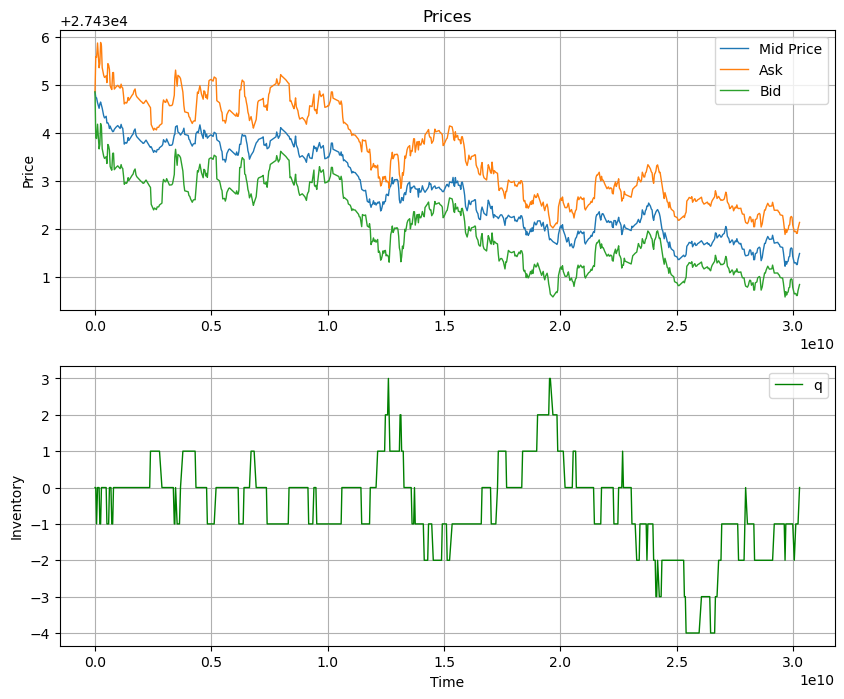

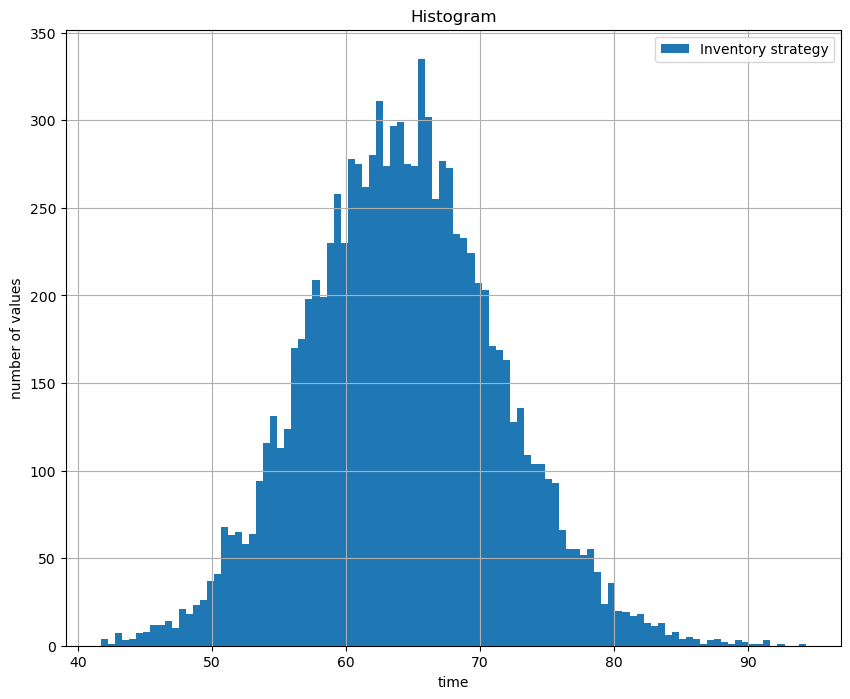

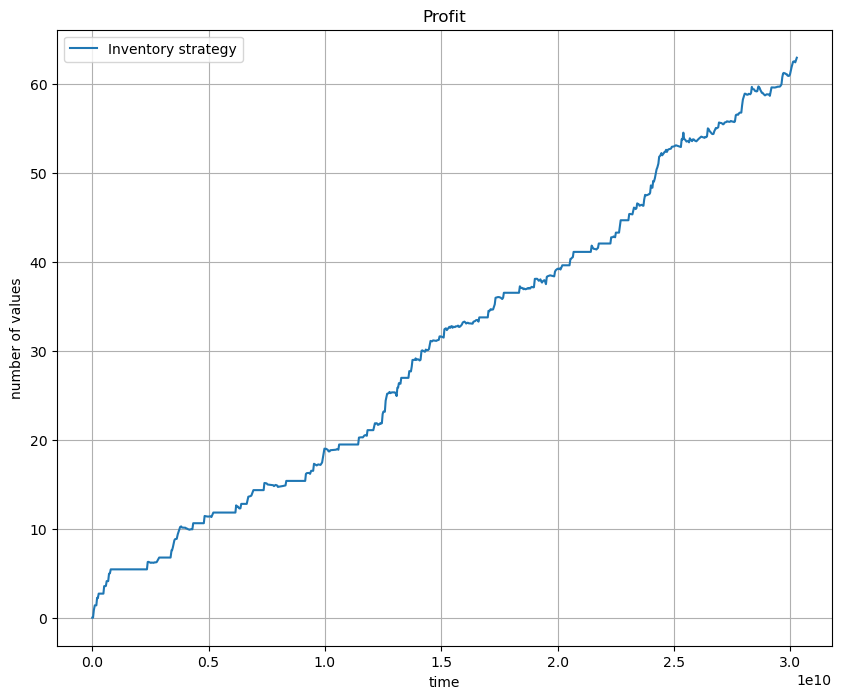

In [10]:
print ("                   Results              ")
print ("----------------------------------------")
print (f"Profit :{round(np.array(profit).mean(),2)}")
print (f"Std(Profit) :{round(np.array(std).std(), 2)}")
    

    
    
fig=plt.figure(figsize=(10,8))  
plt.subplot(2,1,1)
plt.plot(time_records-time_records[0],s, lw=1., label = 'Mid Price')
plt.plot(time_records-time_records[0],ask,lw=1., label = 'Ask')
plt.plot(time_records-time_records[0],bid,lw=1., label = 'Bid')       
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('Price')
plt.title('Prices')

plt.subplot(2,1,2)
plt.plot(time_records-time_records[0], q, 'g', lw = 1., label = 'q') #plot 2 lines
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('Time')
plt.ylabel('Inventory')

plt.figure(figsize = (10,8))
plt.hist(np.array(profit), label = ['Inventory strategy'], bins = 100)
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('number of values')
plt.title('Histogram')


plt.figure(figsize = (10,8))
plt.plot(time_records-time_records[0],equity, label = 'Inventory strategy')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('number of values')
plt.title('Profit')
    
